In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In our dataset there is not any null value.
We will split our dataset into two datasets. one containing all Independent variable another contains target variable.

In [6]:
df_iv = df.iloc[:,:25]

In [7]:
df_tv = df.iloc[:,-1]

In [8]:
df_tv = pd.DataFrame(df_tv)

In [9]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [10]:
df_iv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
pd.options.display.max_columns = None

In [12]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


**Brain_storming** : How to decide which numerical variable is continuous and which one is categorical in large dataset ?

In [13]:
all_feature = df_iv.columns.tolist()

In [14]:
len(all_feature)

25

In [15]:
numerical_feature = [i for i in all_feature if df[i].dtypes != 'O' and i != 'car_ID']

In [16]:
unique_values = [(i,df[i].unique(),len(df[i].unique())) for i in numerical_feature]

In [17]:
unique_values

[('symboling', array([ 3,  1,  2,  0, -1, -2], dtype=int64), 6),
 ('wheelbase',
  array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
          88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
         102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
         112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
         107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
          96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1]),
  53),
 ('carlength',
  array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
         197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
         163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
         159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
         208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
         173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
         181.5, 186.6, 156.9, 157.9, 17

here all numerical variables behave as continuous variables except symbolling.

In [18]:
numerical_feature.remove('symboling')

now, we'll plot histogram for each numerical variable

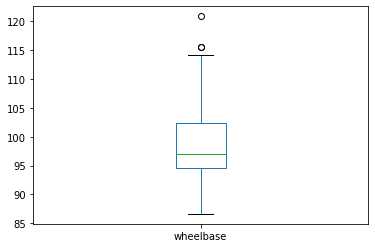

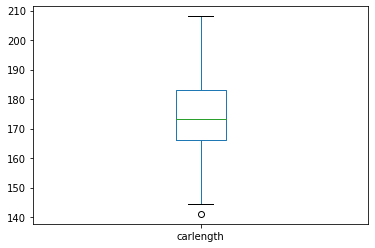

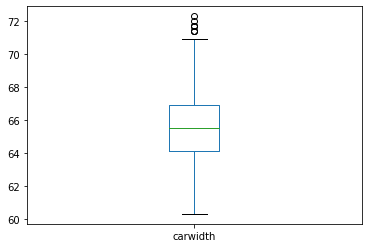

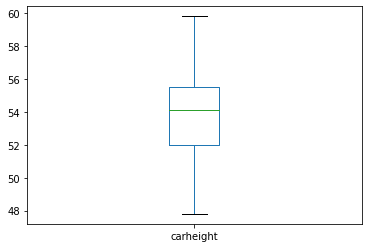

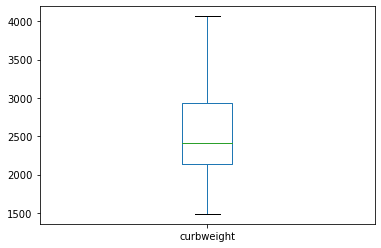

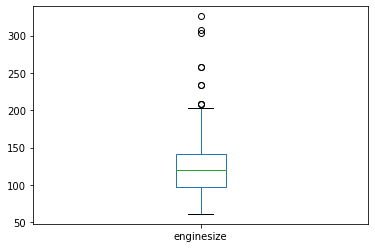

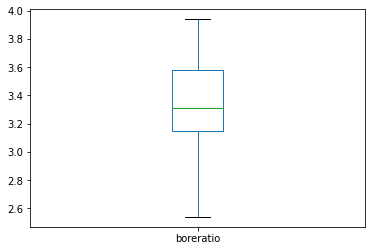

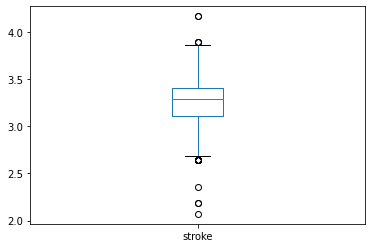

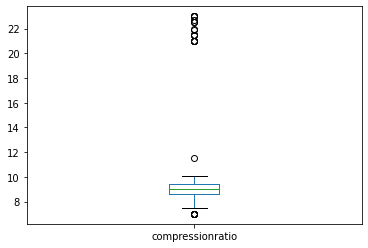

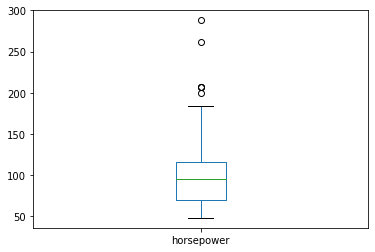

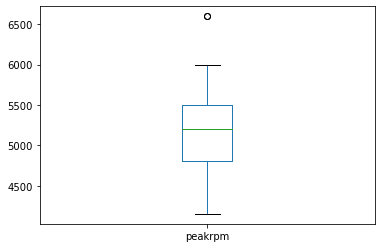

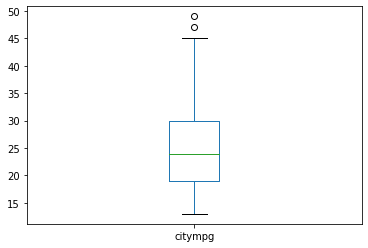

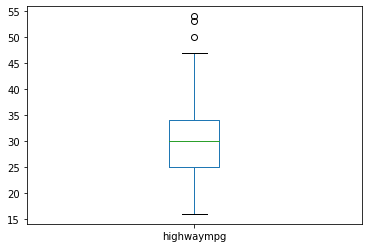

In [19]:
for i in numerical_feature:
    df[i].plot.box()
    plt.show()

In [20]:
outliers_nv = []
for i in numerical_feature:
    q1 = df[i].quantile(0.15)
    q3 = df[i].quantile(0.85)
    iqr = 1.5*(q3-q1)
    if len(df[df[i].lt(q1-iqr) | df[i].gt(q3+iqr)][i]):
        outliers_nv.append((i,len(df[df[i].lt(q1-iqr) | df[i].gt(q3+iqr)][i])))

In [21]:
outliers_nv

[('enginesize', 3), ('stroke', 3), ('compressionratio', 21), ('horsepower', 1)]

In [22]:
outliers_nv2 =set()
for i in numerical_feature:
    q1 = df[i].quantile(0.15)
    q3 = df[i].quantile(0.85)
    iqr = 1.5*(q3-q1)
    if len(df[df[i].lt(q1-iqr) | df[i].gt(q3+iqr)][i]):
        outliers_nv2.update((i,(df[df[i].lt(q1-iqr) | df[i].gt(q3+iqr)][i]))[1].index)

In [23]:
new_df = df.drop(outliers_nv2)

In [24]:
new_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [25]:
new_df[numerical_feature].corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
wheelbase,1.000000,0.849312,0.768199,0.549849,0.718475,0.528866,0.455154,0.189849,-0.256754,0.407717,-0.182259,-0.534832,-0.571429
carlength,0.849312,1.000000,0.829686,0.445086,0.859809,0.681780,0.624556,0.180493,-0.281549,0.620812,-0.155965,-0.744567,-0.749091
carwidth,0.768199,0.829686,1.000000,0.228286,0.824103,0.689038,0.527016,0.232953,-0.332360,0.649242,-0.071062,-0.708366,-0.726558
carheight,0.549849,0.445086,0.228286,1.000000,0.239600,0.062320,0.164543,-0.123324,0.006836,-0.040520,-0.193391,-0.101326,-0.133158
curbweight,0.718475,0.859809,0.824103,0.239600,1.000000,0.864901,0.639322,0.213524,-0.399811,0.823542,-0.126815,-0.843284,-0.861523
enginesize,0.528866,0.681780,0.689038,0.062320,0.864901,1.000000,0.575575,0.274354,-0.311460,0.832962,-0.190728,-0.693767,-0.698764
boreratio,0.455154,0.624556,0.527016,0.164543,0.639322,0.575575,1.000000,-0.161151,-0.219786,0.587430,-0.222064,-0.612720,-0.606302
stroke,0.189849,0.180493,0.232953,-0.123324,0.213524,0.274354,-0.161151,1.000000,-0.320661,0.180237,0.067238,-0.173510,-0.149967
compressionratio,-0.256754,-0.281549,-0.332360,0.006836,-0.399811,-0.311460,-0.219786,-0.320661,1.000000,-0.388419,0.167210,0.472809,0.480373
horsepower,0.407717,0.620812,0.649242,-0.040520,0.823542,0.832962,0.587430,0.180237,-0.388419,1.000000,0.111016,-0.818200,-0.803137


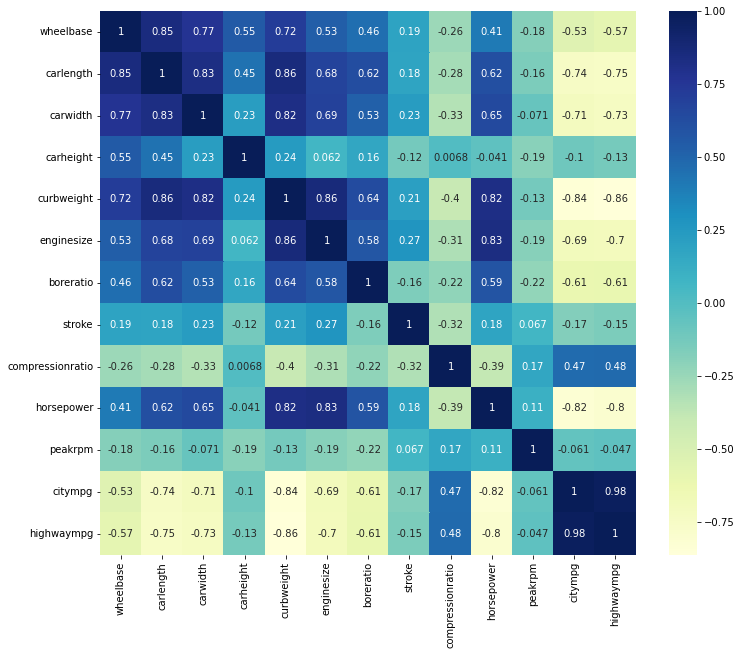

In [32]:
plt.figure(figsize = (12, 10))
sns.heatmap(new_df[numerical_feature].corr(), annot = True, cmap="YlGnBu")
plt.show()


There are some features which are affecting price at very minor scale.
So, we can remove those features.

stroke,compressionratio,carheight and peakerpm we can remove these features.

In [33]:
new_df1 = new_df.drop(columns = ['carheight','stroke','compressionratio','peakrpm'])

In [34]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 204
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_ID          178 non-null    int64  
 1   symboling       178 non-null    int64  
 2   CarName         178 non-null    object 
 3   fueltype        178 non-null    object 
 4   aspiration      178 non-null    object 
 5   doornumber      178 non-null    object 
 6   carbody         178 non-null    object 
 7   drivewheel      178 non-null    object 
 8   enginelocation  178 non-null    object 
 9   wheelbase       178 non-null    float64
 10  carlength       178 non-null    float64
 11  carwidth        178 non-null    float64
 12  curbweight      178 non-null    int64  
 13  enginetype      178 non-null    object 
 14  cylindernumber  178 non-null    object 
 15  enginesize      178 non-null    int64  
 16  fuelsystem      178 non-null    object 
 17  boreratio       178 non-null    flo

# Feature Engineering for categorical variable

In [35]:
all_nf = [i for i in new_df1.columns.tolist()]

In [36]:
all_nf

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'price']

In [37]:
cat_var = [i for i in all_nf if new_df1[i].dtype == 'O']

In [38]:
cat_var

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [39]:
unique_value_cat = [(i,new_df1[i].unique(),len(new_df1[i].unique())) for i in cat_var]

In [40]:
unique_value_cat

[('CarName',
  array(['alfa-romero giulia', 'alfa-romero stelvio',
         'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
         'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
         'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
         'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
         'dodge rampage', 'dodge challenger se', 'dodge d200',
         'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
         'dodge coronet custom', 'dodge dart custom',
         'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
         'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
         'honda accord', 'honda civic 1300', 'honda prelude',
         'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
         'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'maxda rx3',
         'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
         'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazd

In [41]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])

In [42]:
CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [43]:
new_df1.insert(3,"CompanyName",CompanyName)
new_df1.drop(['CarName'],axis=1,inplace=True)

In [44]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 204
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_ID          178 non-null    int64  
 1   symboling       178 non-null    int64  
 2   CompanyName     178 non-null    object 
 3   fueltype        178 non-null    object 
 4   aspiration      178 non-null    object 
 5   doornumber      178 non-null    object 
 6   carbody         178 non-null    object 
 7   drivewheel      178 non-null    object 
 8   enginelocation  178 non-null    object 
 9   wheelbase       178 non-null    float64
 10  carlength       178 non-null    float64
 11  carwidth        178 non-null    float64
 12  curbweight      178 non-null    int64  
 13  enginetype      178 non-null    object 
 14  cylindernumber  178 non-null    object 
 15  enginesize      178 non-null    int64  
 16  fuelsystem      178 non-null    object 
 17  boreratio       178 non-null    flo

In [45]:
new_df1.CompanyName = new_df1.CompanyName.str.lower()

def replace_name(a,b):
    new_df1.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

new_df1.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

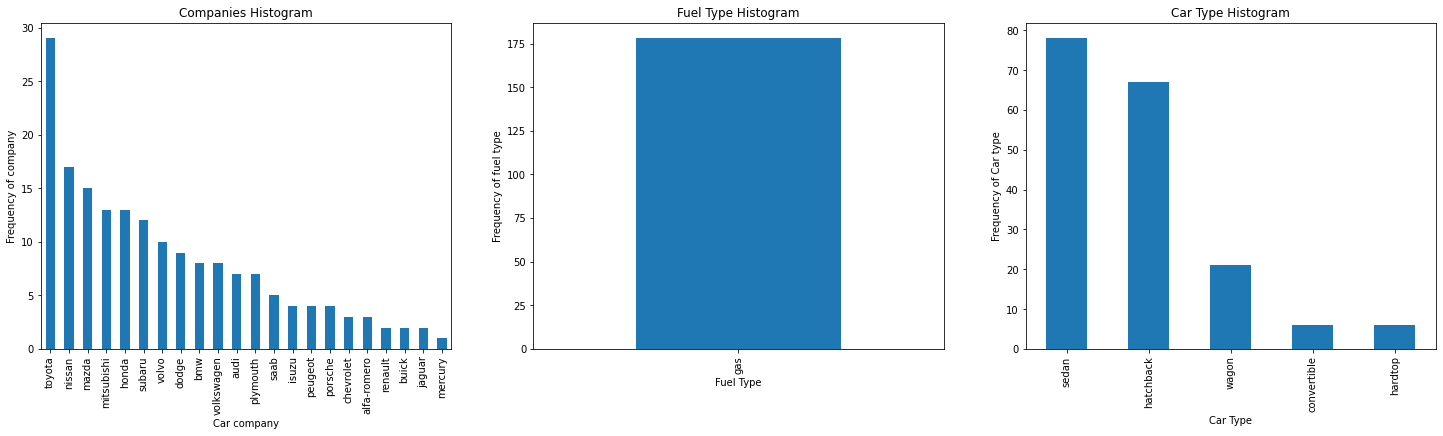

In [46]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = new_df1.CompanyName.value_counts().plot(kind = 'bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = new_df1.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = new_df1.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

### Inference :
1. Toyota seemed to be favored car company.
2. Number of gas fueled cars are more than diesel.
3. sedan is the top car type prefered

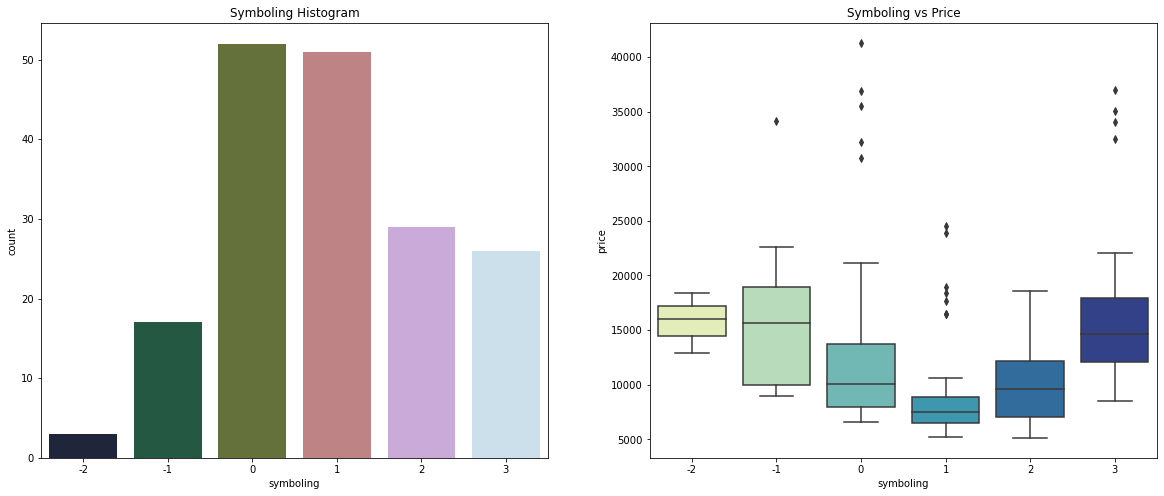

In [47]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(new_df1.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=new_df1.symboling, y=new_df1.price, palette=("YlGnBu"))

plt.show()

### Inference :
1. It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
2. The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it 3. 3. seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

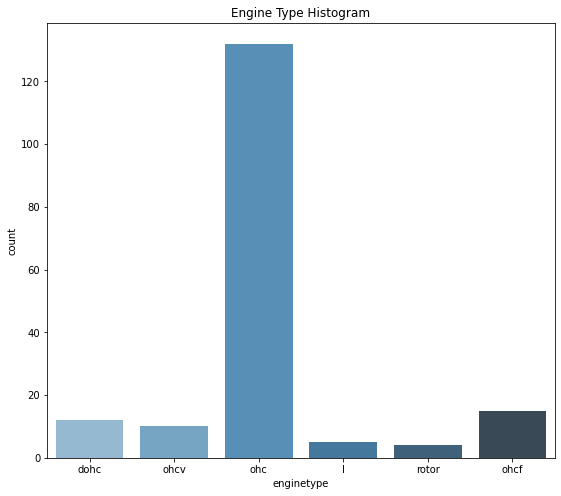

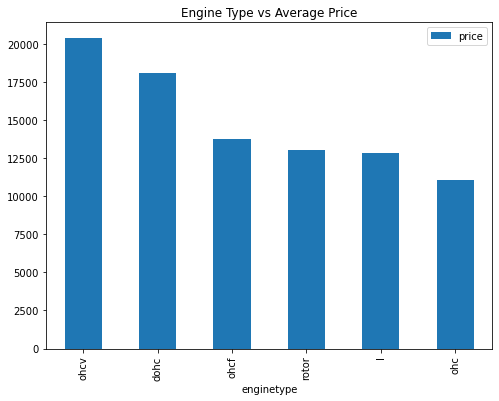

In [48]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(new_df1.enginetype, palette=("Blues_d"))


df_2 = pd.DataFrame(new_df1.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df_2.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()


### Inference :
1. ohc Engine type seems to be most favored type.
2. ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<Figure size 1800x432 with 0 Axes>

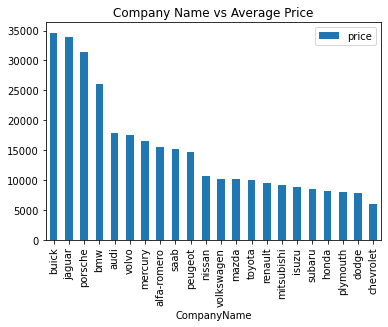

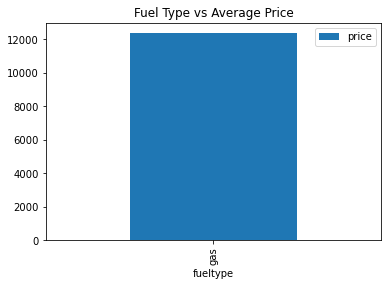

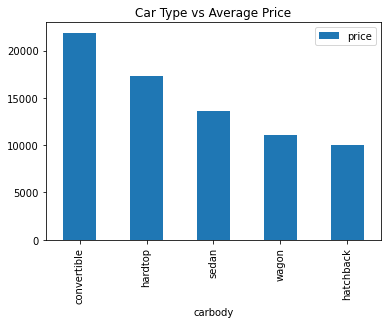

In [49]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(new_df1.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(new_df1.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(new_df1.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

### Inference :
1. Jaguar and Buick seem to have highest average price.
2. hardtop and convertible have higher average price.

# Visualizing Numerical Data

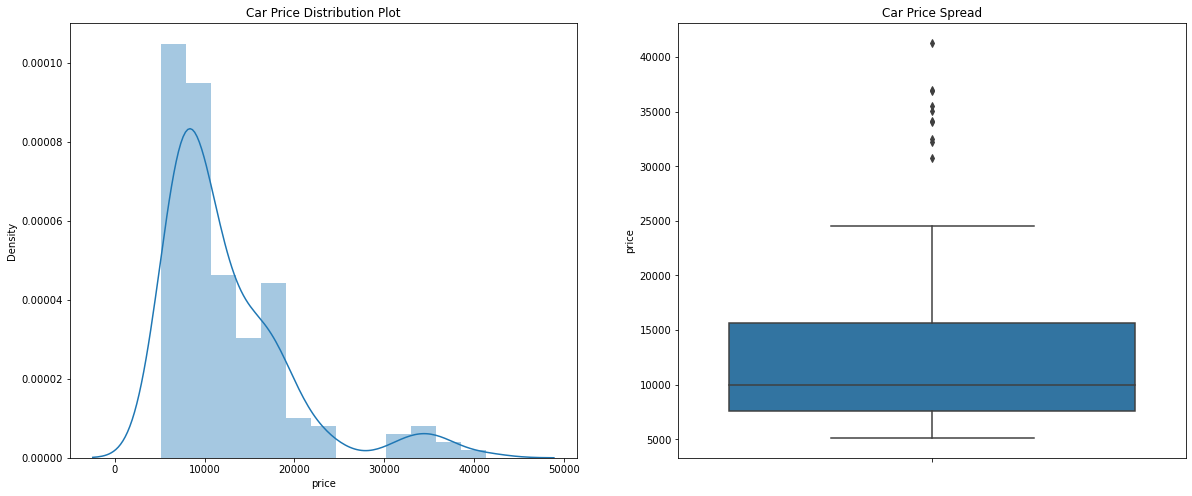

In [50]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(new_df1.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=new_df1.price)

plt.show()

In [51]:
new_df1.price.describe()

count      178.000000
mean     12381.388579
std       7106.318367
min       5118.000000
25%       7609.000000
50%       9959.500000
75%      15678.750000
max      41315.000000
Name: price, dtype: float64

### Inference :
1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
2. There is a significant difference between the mean and the median of the price distribution.

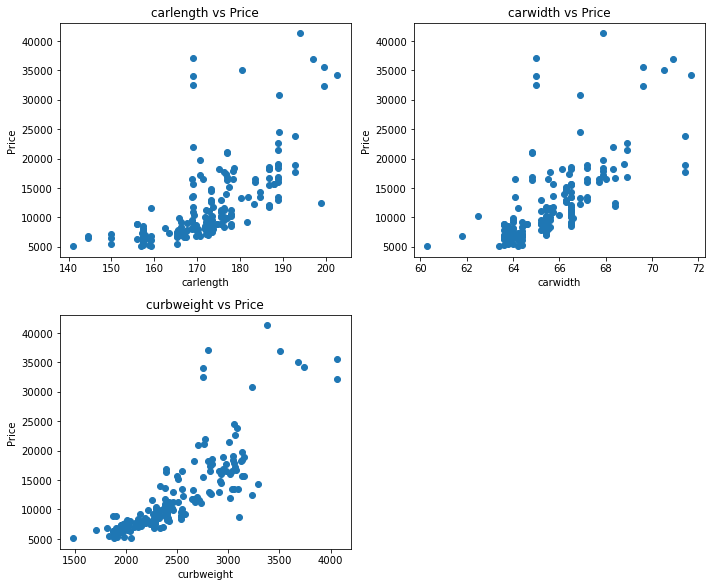

In [52]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(new_df1[x],new_df1['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('curbweight', 3)

plt.tight_layout()

In [53]:
#Binning the Car Companies based on avg prices of each Company.
new_df1['price'] = new_df1['price'].astype('int')
temp = new_df1.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
new_df1_bin=['Budget','Medium','Highend']
new_df1['new_df1range'] = pd.cut(temp['price_y'],bins,right=False,labels=new_df1_bin)
new_df1.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,new_df1range
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450,Medium


In [54]:
cars_lr = new_df1[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth', 'new_df1range']]

In [55]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('new_df1range',cars_lr)
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,l,ohc,ohcf,ohcv,rotor,five,four,six,three,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,21,27,168.8,64.1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,21,27,168.8,64.1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,19,26,171.2,65.5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
3,13950,99.8,2337,109,3.19,102,24,30,176.6,66.2,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,18,22,176.6,66.4,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [56]:
cars_lr.shape

(178, 29)

# Data Splitting and Scaling 

In [57]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 204
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       178 non-null    int32  
 1   wheelbase   178 non-null    float64
 2   curbweight  178 non-null    int64  
 3   enginesize  178 non-null    int64  
 4   boreratio   178 non-null    float64
 5   horsepower  178 non-null    int64  
 6   citympg     178 non-null    int64  
 7   highwaympg  178 non-null    int64  
 8   carlength   178 non-null    float64
 9   carwidth    178 non-null    float64
 10  turbo       178 non-null    uint8  
 11  hardtop     178 non-null    uint8  
 12  hatchback   178 non-null    uint8  
 13  sedan       178 non-null    uint8  
 14  wagon       178 non-null    uint8  
 15  fwd         178 non-null    uint8  
 16  rwd         178 non-null    uint8  
 17  l           178 non-null    uint8  
 18  ohc         178 non-null    uint8  
 19  ohcf        178 non-null    u

In [58]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','citympg','highwaympg','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [60]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,l,ohc,ohcf,ohcv,rotor,five,four,six,three,two,Medium,Highend
150,0.005447,0.329710,0.192785,0.157360,0.293651,0.088050,0.588235,0.571429,0.300855,0.297297,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
161,0.088679,0.329710,0.245927,0.187817,0.404762,0.138365,0.382353,0.428571,0.430769,0.369369,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
12,0.437424,0.528986,0.474011,0.522843,0.500000,0.459119,0.176471,0.257143,0.610256,0.405405,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
16,1.000000,0.612319,0.733902,0.751269,0.746032,0.842767,0.029412,0.085714,0.900855,0.684685,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
135,0.286445,0.452899,0.492630,0.304569,0.682540,0.389937,0.176471,0.257143,0.777778,0.558559,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0


In [61]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,l,ohc,ohcf,ohcv,rotor,five,four,six,three,two,Medium,Highend
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.185447,0.392824,0.360576,0.292861,0.485407,0.332674,0.302182,0.343088,0.517728,0.463673,0.137097,0.016129,0.419355,0.451613,0.096774,0.661290,0.274194,0.024194,0.741935,0.104839,0.040323,0.032258,0.048387,0.782258,0.129032,0.008065,0.032258,0.362903,0.088710
std,0.193969,0.179000,0.176694,0.173912,0.204726,0.223892,0.187273,0.184284,0.194915,0.163558,0.345345,0.126483,0.495455,0.499672,0.296849,0.475191,0.447917,0.154273,0.439345,0.307588,0.197513,0.177401,0.215453,0.414385,0.336596,0.089803,0.177401,0.482788,0.285478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.059285,0.286232,0.212083,0.182741,0.347222,0.138365,0.117647,0.171429,0.413675,0.331081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.113856,0.351449,0.335337,0.243655,0.424603,0.264151,0.294118,0.342857,0.523077,0.459459,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.236983,0.464674,0.478472,0.356599,0.682540,0.427673,0.441176,0.514286,0.610256,0.558559,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


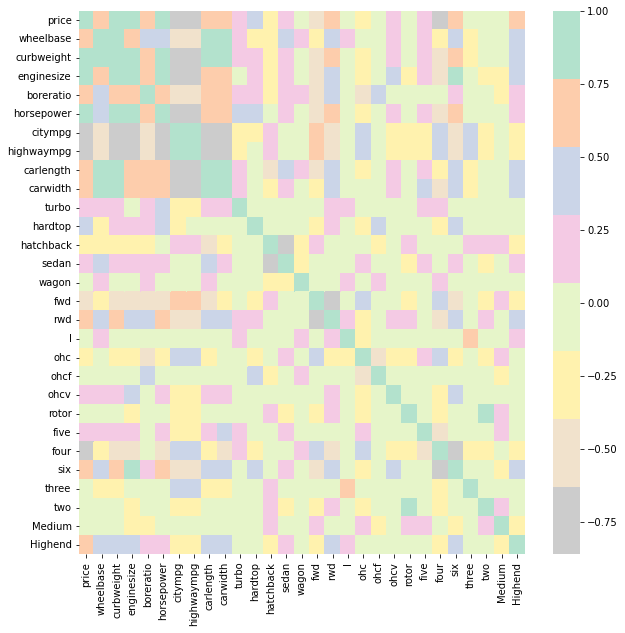

In [63]:
#Correlation using heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(df_train.corr(), cmap="Pastel2_r")
plt.show()

In [71]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [72]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [74]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 17),
 ('curbweight', True, 1),
 ('enginesize', False, 6),
 ('boreratio', False, 8),
 ('horsepower', True, 1),
 ('citympg', False, 10),
 ('highwaympg', True, 1),
 ('carlength', False, 2),
 ('carwidth', True, 1),
 ('turbo', False, 13),
 ('hardtop', True, 1),
 ('hatchback', False, 3),
 ('sedan', False, 5),
 ('wagon', False, 4),
 ('fwd', False, 18),
 ('rwd', False, 19),
 ('l', True, 1),
 ('ohc', False, 9),
 ('ohcf', False, 12),
 ('ohcv', True, 1),
 ('rotor', False, 16),
 ('five', False, 11),
 ('four', True, 1),
 ('six', False, 7),
 ('three', True, 1),
 ('two', False, 14),
 ('Medium', False, 15),
 ('Highend', True, 1)]

In [75]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'highwaympg', 'carwidth', 'hardtop', 'l',
       'ohcv', 'four', 'three', 'Highend'],
      dtype='object')

In [76]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,highwaympg,carwidth,hardtop,l,ohcv,four,three,Highend
150,0.192785,0.088050,0.571429,0.297297,0,0,0,1,0,0
161,0.245927,0.138365,0.428571,0.369369,0,0,0,1,0,0
12,0.474011,0.459119,0.257143,0.405405,0,0,0,0,0,1
16,0.733902,0.842767,0.085714,0.684685,0,0,0,0,0,1
135,0.492630,0.389937,0.257143,0.558559,0,0,0,1,0,0


In [77]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [78]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     122.2
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           9.26e-56
Time:                        12:35:14   Log-Likelihood:                 181.00
No. Observations:                 124   AIC:                            -340.0
Df Residuals:                     113   BIC:                            -309.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1135      0.047     -2.427      0.0

### p-value of three to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [79]:
X_train_new = X_train_rfe.drop(["three"], axis = 1)

# Model 2

In [80]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     135.4
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.36e-56
Time:                        12:37:31   Log-Likelihood:                 180.38
No. Observations:                 124   AIC:                            -340.8
Df Residuals:                     114   BIC:                            -312.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1107      0.047     -2.370      0.0

In [81]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,77.98
1,curbweight,13.70
2,horsepower,7.40
3,highwaympg,4.68
4,carwidth,3.97
8,four,1.88
5,hardtop,1.75
9,Highend,1.74
7,ohcv,1.39
6,l,1.10


curbweight has high VIF value so we can drop it.

In [82]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

### Model 3

In [83]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     143.5
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           3.88e-56
Time:                        12:39:39   Log-Likelihood:                 176.47
No. Observations:                 124   AIC:                            -334.9
Df Residuals:                     115   BIC:                            -309.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0601      0.044     -1.364      0.1

In [84]:
X_train_new['curbweight'] = X_train_rfe['curbweight']

## Residual Analysis

In [85]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

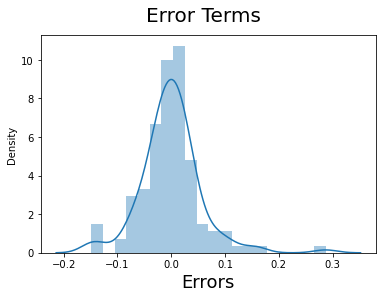

In [86]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)   

It is near to normal distribution so we can say our prediction model is fulfulling all the requirements

#### Prediction and Evaluation of the model

In [88]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','citympg','highwaympg','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [89]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [90]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [91]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [92]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.4500254352619405

Text(0, 0.5, 'y_pred')

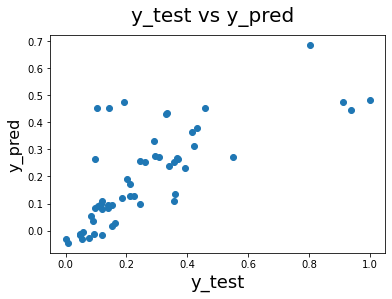

In [93]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

In [94]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     135.4
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.36e-56
Time:                        12:48:10   Log-Likelihood:                 180.38
No. Observations:                 124   AIC:                            -340.8
Df Residuals:                     114   BIC:                            -312.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1107      0.047     -2.370      0.0

Inference :

1. R-sqaured and Adjusted R-squared (extent of fit) - ~0.9 - 90% variance explained.
2. F-stats and Prob(F-stats) (overall model fit) - 135.4 and 1.36e-56(approx. 0.0) - Model fit is significant and explained 90% variance is just not by chance.
3. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant